<a href="https://colab.research.google.com/github/mahithagarikipati/Communal-Appliance-And-Sharing/blob/master/SVM_Checkpoint.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [30]:
import numpy as np
import pandas as pd 

data = pd.read_csv('/content/drive/MyDrive/Intelligent Systems Term Project/spam_or_not_spam.csv')

#Lower casing all the fields in the email_body
data['email_body'] = data['email_body'].str.lower()
data.head(10)
data = data.dropna()


In [31]:
import pandas as pd
import numpy as np
import sklearn.metrics as metrics
from nltk.tokenize import word_tokenize
from nltk import pos_tag
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.preprocessing import LabelEncoder
from collections import defaultdict
from nltk.corpus import wordnet as wn
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import model_selection, svm
from sklearn.metrics import accuracy_score


In [32]:
data['email_body'] = data['email_body'].str.replace('\W', ' ') 

data.head(10)

,email_body,spam?
0,date wed number aug number number number numb...,0.0
1,martin a posted tassos papadopoulos the greek ...,0.0
2,man threatens explosion in moscow thursday aug...,0.0
3,klez the virus that won t die already the most...,0.0
4,in adding cream to spaghetti carbonara which ...,0.0
5,i just had to jump in here as carbonara is on...,0.0
6,the scotsman number august number playboy want...,0.0
7,martin adamson wrote isn t it just basically a...,0.0
8,the scotsman thu number aug number meaningful ...,0.0
9,i have been trying to research via sa mirrors ...,0.0


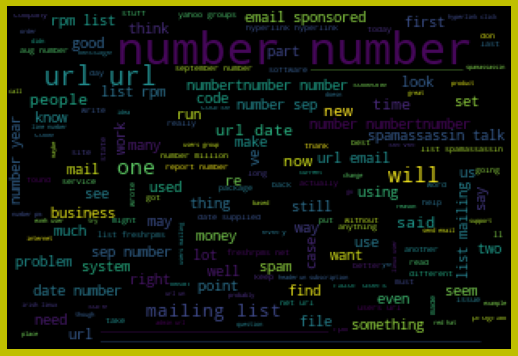

In [33]:
from wordcloud import WordCloud 
emailArray = []
for index,row in data.iterrows():
    emailArray.append(row['email_body'])
CombiningEmails = (' ').join(emailArray)

#Creating word cloud graphic and displaying
wc = WordCloud(width=312, height=212).generate(CombiningEmails)
plt.figure(figsize=(7,7), facecolor='y')
plt.imshow(wc)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

In [34]:
from sklearn.feature_extraction.text import CountVectorizer
import time

t = time.time()
wordList = data['email_body']
vect = CountVectorizer()
count=  vect.fit_transform(wordList)
tokenizedDf = pd.DataFrame(count.toarray(), columns=vect.get_feature_names())
resultEncodingDict = {1: 1, 0: 0}
resultList = data['spam?']
resultList.replace(resultEncodingDict, inplace=True)
#xTrain, xTest, yTrain, yTest = train_test_split(tokenizedDf, resultList, test_size=.3, random_state=123)
xTrain, xTest, yTrain, yTest= model_selection.train_test_split(data['email_body'],data['spam?'],test_size=0.3)

In [35]:
Encoder = LabelEncoder()
yTrain = Encoder.fit_transform(yTrain)
yTest = Encoder.fit_transform(yTest)

# Step - 4: Vectorize the words by using TF-IDF Vectorizer - This is done to find how important a word in document is in comaprison to the corpus
Tfidf_vect = TfidfVectorizer(max_features=5000)
Tfidf_vect.fit(data['email_body'])

xTrain = Tfidf_vect.transform(xTrain)
xTest = Tfidf_vect.transform(xTest)


In [36]:
from sklearn import  svm
SVM = svm.SVC(C=1.0, kernel='linear', degree=3, gamma='auto')
SVM.fit(xTrain, yTrain)
# predict the labels on validation dataset
predictions_SVM = SVM.predict(xTest)
# Use accuracy_score function to get the accuracy
print("SVM Accuracy Score -> ",accuracy_score(predictions_SVM, yTest)*100)
elapsed = time.time() - t
print(elapsed)

SVM Accuracy Score ->  98.66666666666667
6.046219110488892


In [37]:
cm = metrics.confusion_matrix(yTest, predictions_SVM)
TN = cm[0][0]
FN = cm[1][0]
TP = cm[1][1]
FP = cm[0][1]
print ("TN: ", TN, ", FP: ", FP, ", FN: ", FN, ", TP: ", TP)

print("SVM recall_score: {}".format(metrics.recall_score(yTest, predictions_SVM)))
print("SVM Accuracy: {}".format(metrics.accuracy_score(yTest, predictions_SVM)))
print("SVM F-1.5: {}".format(metrics.fbeta_score(yTest, predictions_SVM, average='micro', beta=1.5)))
print("SVM balanced Accuracy: {}".format(metrics.balanced_accuracy_score(yTest, predictions_SVM)))

print("SVM precision_score: {}".format(metrics.precision_score(yTest, predictions_SVM)))
#print("SVM roc_auc_score: {}".format(metrics.roc_auc_score(yTest, predictions_SVM)))

#print("SVM precision_recall_curve:")
#metrics.precision_recall_curve(yTest, predictions_SVM)

print("Elapsed time: {} seconds".format(elapsed))


TN:  752 , FP:  0 , FN:  12 , TP:  136
SVM recall_score: 0.918918918918919
SVM Accuracy: 0.9866666666666667
SVM F-1.5: 0.9866666666666666
SVM balanced Accuracy: 0.9594594594594594
SVM precision_score: 1.0
Elapsed time: 6.046219110488892 seconds
